In [2]:
from __future__ import print_function
from packaging.version import parse as Version 
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m' 
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % sys.version)
    
def import_version(pkg, min_ver, fail_msg=""): 
    mod = None
    try:
        mod = importlib.import_module(pkg) 
        if pkg in {'PIL'}:
            ver = mod.VERSION 
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed." 
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver)) 
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg)) 
    return mod

# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion) 
else: 
    print(FAIL, "Unknown Python version: %s" % pyversion)
    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0",
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1",'seaborn': "0.12.2"}
# now the dependencies
for lib, required_version in list(requirements.items()): 
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib
import io
from matplotlib import pylab as plt
import requests

#reading in the data from the Life Expectancy csv file into at Data Frame df
df = pd.read_csv('data/Life Expectancy Data.csv')
#printing the types of each feature in the dataframe
print(df.dtypes)

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [91]:
#printing the number of rows and columns in the dataframe
print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

Number of Rows:  2938
Number of Columns:  22


In [92]:
#printing the column names
print(df.columns.values)

['Country' 'Year' 'Status' 'Life expectancy ' 'Adult Mortality'
 'infant deaths' 'Alcohol' 'percentage expenditure' 'Hepatitis B'
 'Measles ' ' BMI ' 'under-five deaths ' 'Polio' 'Total expenditure'
 'Diphtheria ' ' HIV/AIDS' 'GDP' 'Population' ' thinness  1-19 years'
 ' thinness 5-9 years' 'Income composition of resources' 'Schooling']


In [93]:
#returning array of all countrie names in database
unique_countries = df['Country'].unique()
#printing number of countries
print(len(unique_countries))

#finding the number of time a country was recorded
frequency = df['Country'].value_counts()
print(frequency[150:194])

193
Country
Iran (Islamic Republic of)    16
Iraq                          16
Israel                        16
Guatemala                     16
Italy                         16
Jamaica                       16
Japan                         16
Jordan                        16
Kazakhstan                    16
Kenya                         16
Kiribati                      16
Kuwait                        16
Kyrgyzstan                    16
Guinea                        16
Zimbabwe                      16
Grenada                       16
France                        16
Dominican Republic            16
Ecuador                       16
Egypt                         16
El Salvador                   16
Equatorial Guinea             16
Eritrea                       16
Estonia                       16
Ethiopia                      16
Fiji                          16
Greece                        16
Finland                       16
Gabon                         16
Gambia                        1

In [94]:
#printing the descriptive statistics about the target variable
print(df['Life expectancy '].describe())

count    2928.000000
mean       69.224932
std         9.523867
min        36.300000
25%        63.100000
50%        72.100000
75%        75.700000
max        89.000000
Name: Life expectancy , dtype: float64


In [95]:
#showing the count for each category in the country feature
print(df['Country'].value_counts())

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64


In [96]:
#showing the count for each category in the Status feature
print(df['Status'].value_counts())

Status
Developing    2426
Developed      512
Name: count, dtype: int64


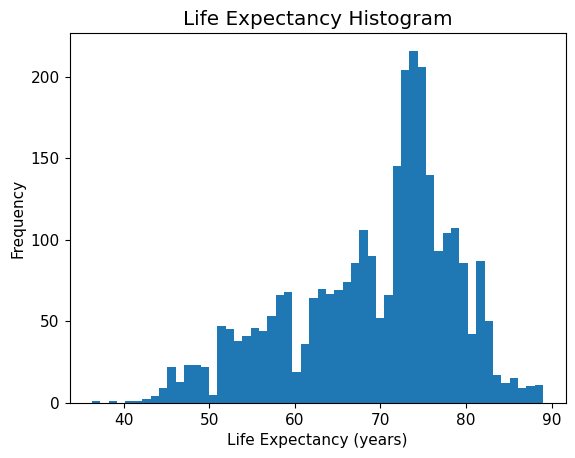

In [97]:
#preparing the histogram for life expectancy 
df['Life expectancy '].plot.hist(bins = int(np.sqrt(df.shape[0])))
#changing the font size
plt.rcParams.update({'font.size': 12})
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy Histogram')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()

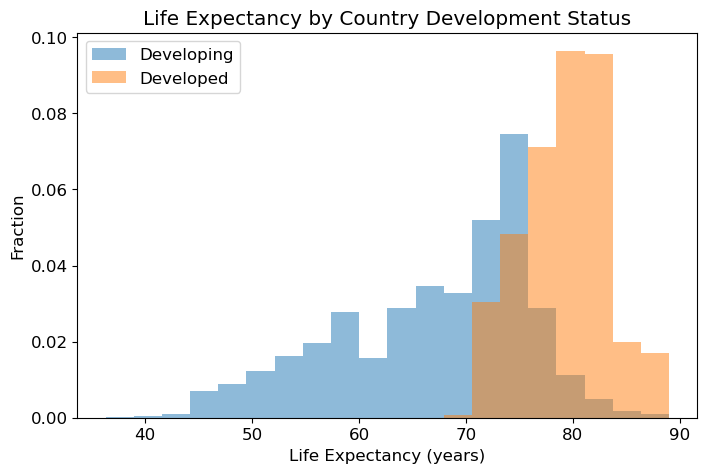

In [98]:
import matplotlib
from matplotlib import pylab as plt

#initializing categories
categories = df['Status'].unique()
#initializing bin range to the min and max of life expectancy in the dataframe
bin_range = (df['Life expectancy '].min(),df['Life expectancy '].max())
#setting the size of the graph
plt.figure(figsize=(8,5))

#plotting the histogram 
for c in categories: plt.hist(df[df['Status']==c]['Life expectancy '],alpha=0.5,label=c,range=bin_range,bins=20,density=True) 
plt.legend()
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy by Country Development Status')
plt.ylabel('Fraction')
plt.xlabel('Life Expectancy (years)')
plt.show()

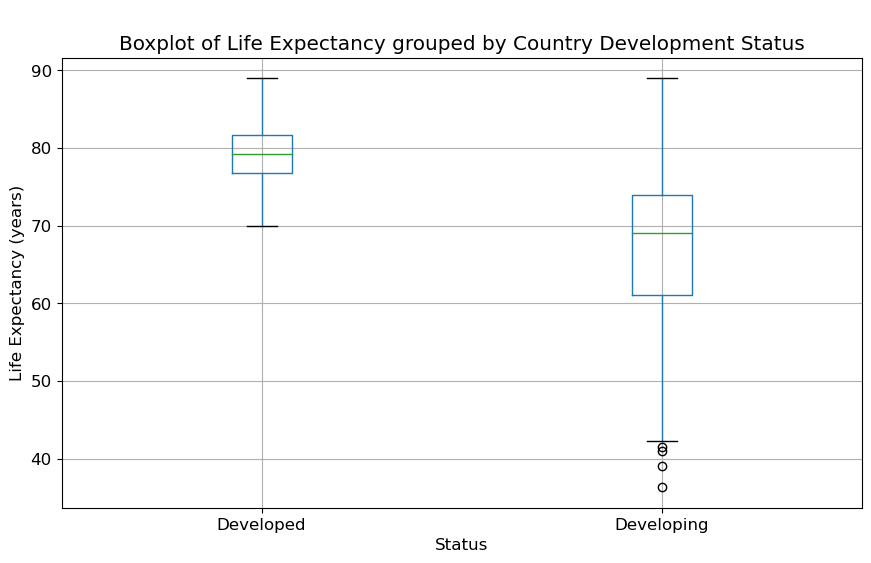

In [99]:
df[['Life expectancy ','Status']].boxplot(by='Status',figsize=(10,6))
#changing the font size
plt.rcParams.update({'font.size': 12})
#setting the graph, x-axis, and y-axis title 
plt.ylabel('Life Expectancy (years)')
plt.xlabel('Status')
plt.title('Boxplot of Life Expectancy grouped by Country Development Status')
plt.suptitle(' ')
plt.show()

In [100]:
#changing all null values in the dataframe to -1 in order to plot heatmaps below
df = df.replace(np.nan, -1)

In [133]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' BMI '],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

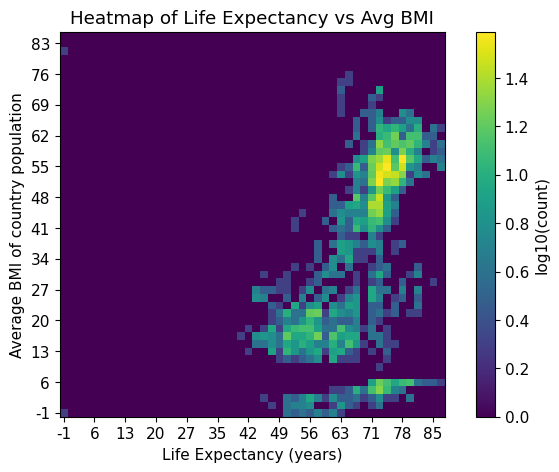

In [134]:
heatmap[heatmap == 0] = 0.1
plt.figure(figsize=(8,5))
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Avg BMI')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Average BMI of country population')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [135]:
#initializing nbins
nbins = 60
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Adult Mortality'],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

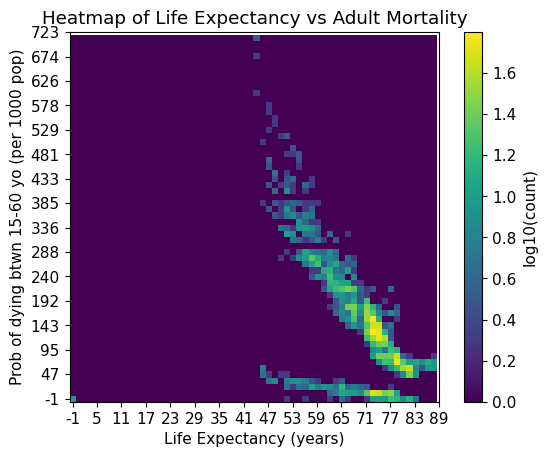

In [136]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Adult Mortality')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Prob of dying btwn 15-60 yo (per 1000 pop)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [137]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['infant deaths'],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

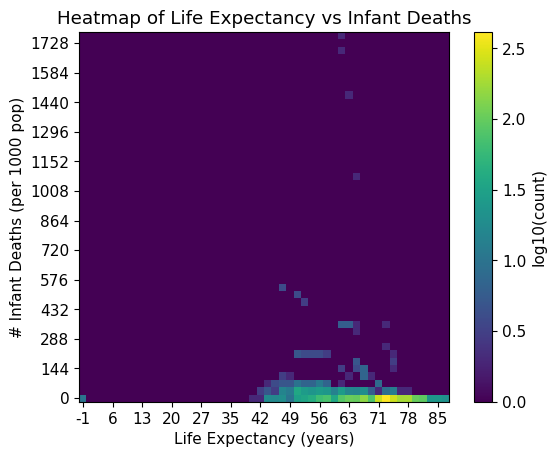

In [138]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Infant Deaths')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('# Infant Deaths (per 1000 pop)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [141]:
#initializing nbins
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Alcohol'],bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

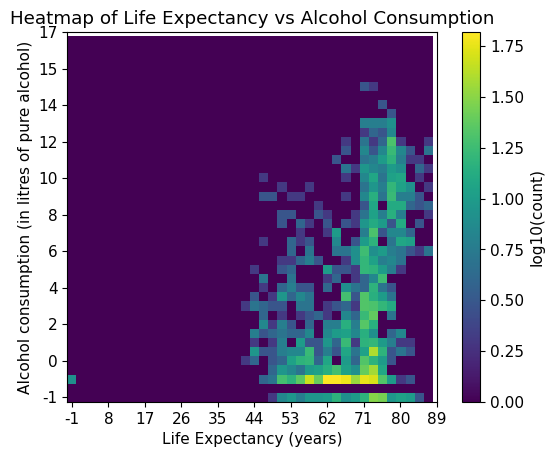

In [142]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Alcohol Consumption')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Alcohol consumption (in litres of pure alcohol)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [143]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['percentage expenditure'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

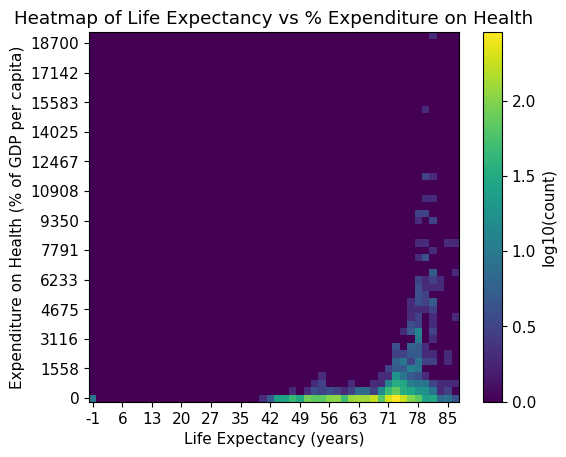

In [145]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs % Expenditure on Health')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Expenditure on Health (% of GDP per capita)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [146]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Hepatitis B'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

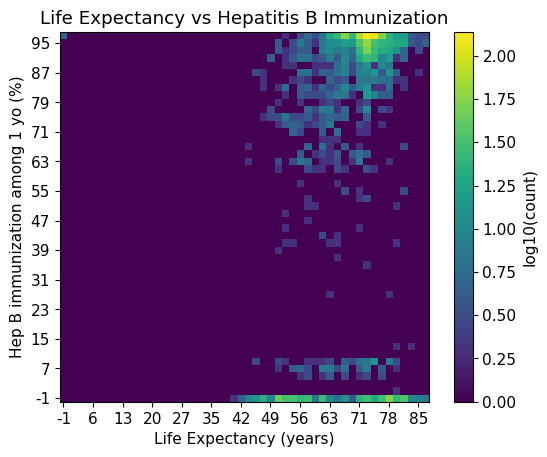

In [147]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy vs Hepatitis B Immunization')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Hep B immunization among 1 yo (%)')
plt.rcParams.update({'font.size': 11})
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [148]:
#initializing nbins
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Measles '],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

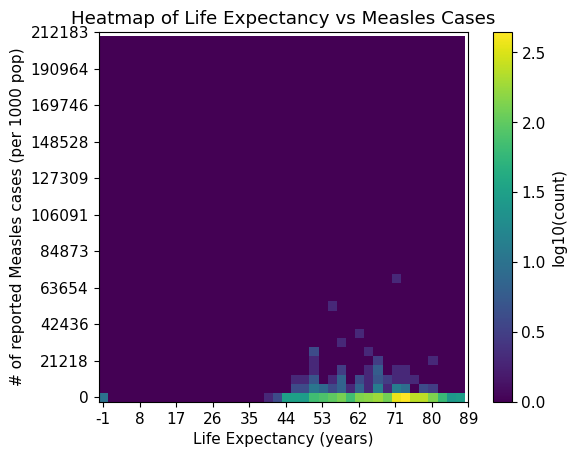

In [149]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Measles Cases')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('# of reported Measles cases (per 1000 pop)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [150]:
#initializing nbins
nbins = 40
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['under-five deaths '],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

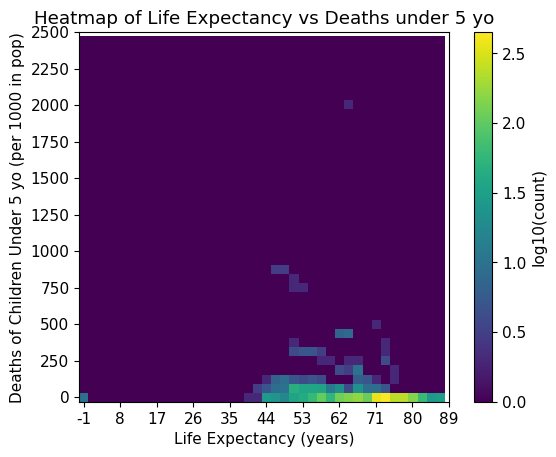

In [151]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Deaths under 5 yo')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Deaths of Children Under 5 yo (per 1000 in pop)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [152]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Polio'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

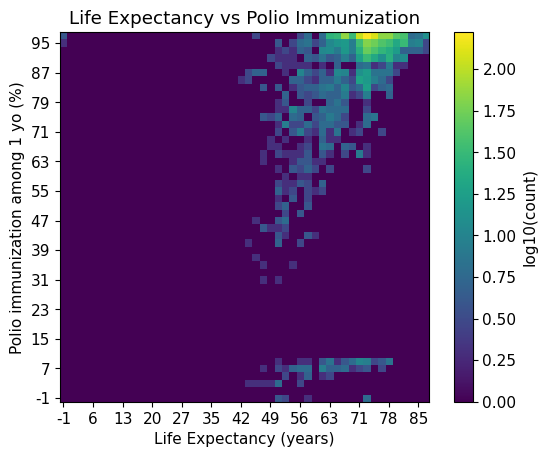

In [153]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy vs Polio Immunization')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Polio immunization among 1 yo (%)')
plt.rcParams.update({'font.size': 11})
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [154]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Total expenditure'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

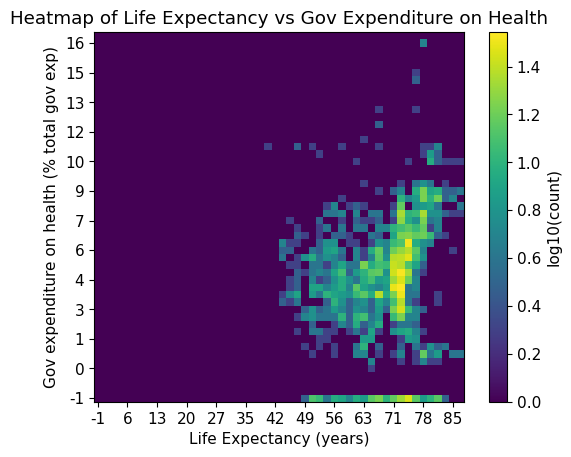

In [155]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs Gov Expenditure on Health')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Gov expenditure on health (% total gov exp)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [156]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Diphtheria '],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

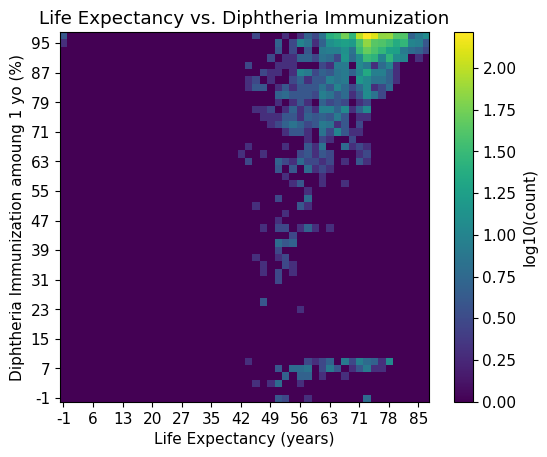

In [157]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Life Expectancy vs. Diphtheria Immunization')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Diphtheria Immunization amoung 1 yo (%)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.rcParams.update({'font.size': 11})
plt.show()

In [158]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' HIV/AIDS'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

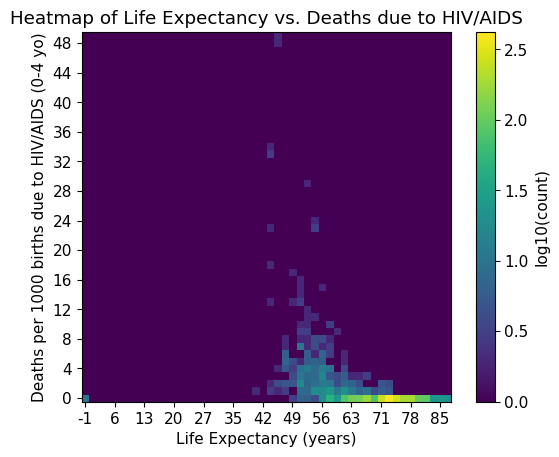

In [159]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs. Deaths due to HIV/AIDS')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Deaths per 1000 births due to HIV/AIDS (0-4 yo)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [160]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['GDP'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

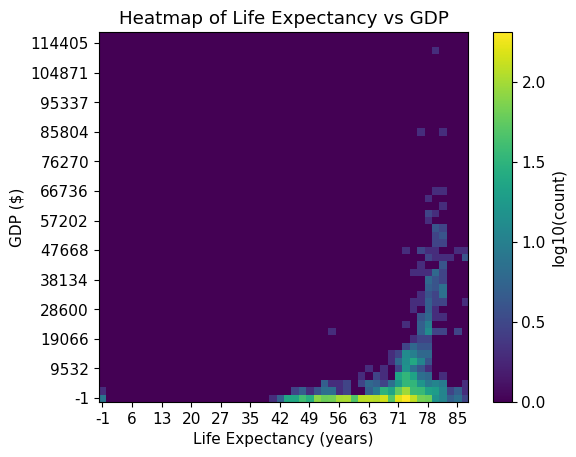

In [162]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs GDP')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('GDP ($)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [163]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' thinness  1-19 years'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

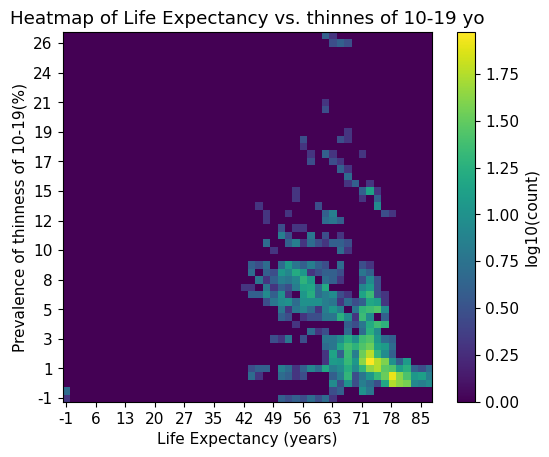

In [164]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs. thinnes of 10-19 yo')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Prevalence of thinness of 10-19(%)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [165]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df[' thinness 5-9 years'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

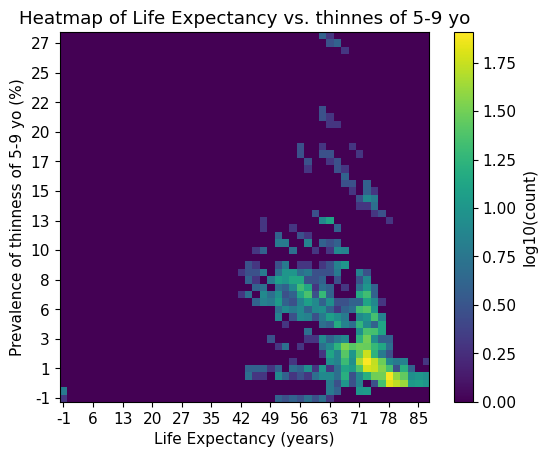

In [166]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs. thinnes of 5-9 yo')
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Prevalence of thinness of 5-9 yo (%)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [167]:
#initializing nbins
nbins = 50
heatmap, xedges, yedges = np.histogram2d(df['Life expectancy '], df['Schooling'],bins=nbins)
extent = [xedges[0], xedges[0], yedges[0], yedges[0]]

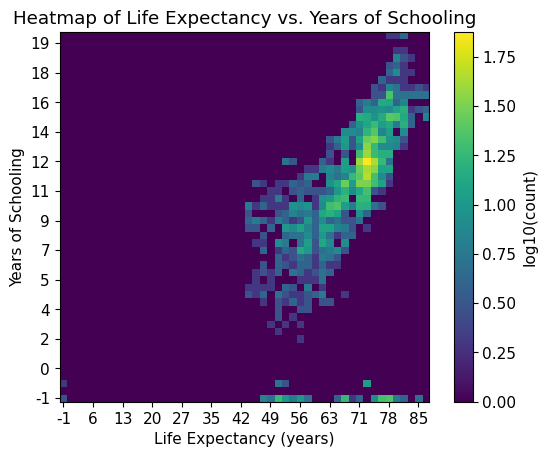

In [168]:
heatmap[heatmap == 0] = 0.1
plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0)
#setting the graph, x-axis, and y-axis title 
plt.title('Heatmap of Life Expectancy vs. Years of Schooling')
plt.rcParams.update({'font.size': 11})
plt.xlabel('Life Expectancy (years)')
plt.ylabel('Years of Schooling')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)')
plt.show()

In [5]:
#seperating the feature matrix X and target variable y
y = df['Life expectancy ']
X = df.drop(columns=['Life expectancy '])
#setting the group variable to the Country feature in the dataframe
groups = df['Country']

In [6]:
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit

#initializing the random state
random_state = 42

#initilizing Group Shuffle Split that will be passed to the dataframe
splitter = GroupShuffleSplit(n_splits = 1, train_size=0.8,random_state=random_state)

#using splitter (initialixed above) to split the indexes of the data frame into test and other 
other_index, test_index = next(splitter.split(X,y,groups))

#using indexes above to form X_test, y_test, X_other, y_other, and group_other
X_test = X.iloc[test_index,]
y_test = y.iloc[test_index,]
X_other = X.iloc[other_index,]
y_other = y.iloc[other_index,]
groups_other = groups.iloc[other_index,]

#initializing an instance of group kfold with four folds
group_kfold = GroupKFold(n_splits = 4)

#performing group kfold split to form X_train, y_train, X_val and y_val
for train_index, val_index in group_kfold.split(X_other, y_other,groups_other): 
    X_train = X_other.iloc[train_index,]
    y_train = y_other.iloc[train_index,]
    X_val = X_other.iloc[val_index,]
    y_val = y_other.iloc[val_index,]

    
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1764, 21)
(580, 21)
(594, 21)


In [16]:
#returning array of all countrie names in database
unique_countries = X_test['Country'].unique()
#printing number of countries
print(len(unique_countries))

#finding the number of time a country was recorded
frequency = X_test['Country'].value_counts()
print(frequency[150:194])

39
Series([], Name: count, dtype: int64)


In [7]:
from sklearn.preprocessing import OneHotEncoder

#creating categorical feature matrix
cat_ftrs = ['Country', 'Status']

#instance of the one hot encoder function
enc = OneHotEncoder(sparse_output=False, handle_unknown = 'ignore') 

#fitting the categorical features of the training set
enc.fit(X_train[cat_ftrs])

#transforming the categorical features in the train, test, and validation sets
X_train_ohe = enc.transform(X_train[cat_ftrs])
X_test_ohe = enc.transform(X_test[cat_ftrs])
X_val_ohe = enc.transform(X_val[cat_ftrs])

print(X_train_ohe)
print(X_train_ohe.shape)
print(X_test_ohe.shape)
print(X_val_ohe.shape)

[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 1. 0. 1.]]
(1764, 116)
(594, 116)
(580, 116)


In [8]:
from sklearn.preprocessing import StandardScaler

#creating continuous feature matrix
cont_ftrs = ['Year', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
             'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
             ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

#instance of the standard scaler function
scaler = StandardScaler()

#fitting and transforming the continuous features of the training set
X_train_cont = scaler.fit_transform(X_train[cont_ftrs])

#transforming the continuous features of the test and validation sets
X_test_cont = scaler.transform(X_test[cont_ftrs])
X_val_cont = scaler.transform(X_val[cont_ftrs])

In [9]:
#combinin the continous and categorical training sets into one dataset
train_data = np.concatenate((X_train_cont, X_train_ohe), axis = 1)
test_data = np.concatenate((X_test_cont, X_test_ohe), axis = 1)
val_data = np.concatenate((X_val_cont, X_val_ohe), axis = 1)

#creating a dataframe with the fit and transformed dataset of all features
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
df_val = pd.DataFrame(val_data)

In [10]:
df_train

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,1.623499,0.758742,0.480426,-1.154080,-0.370783,-0.652972,-0.093144,-0.989250,0.427782,-3.270694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.406672,0.820152,0.507716,-1.154080,-0.369616,-0.774205,-0.149459,-1.014045,0.456087,-1.047444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.189845,0.797123,0.535006,-1.154080,-0.369774,-0.693383,-0.154733,-1.038840,0.484391,-0.876425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.973018,0.827828,0.575942,-1.154080,-0.367192,-0.572149,0.045774,-1.063635,0.522131,-0.662651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.756191,0.850857,0.603232,-1.154080,-0.404163,-0.531738,0.064999,-1.083471,0.559870,-0.619896,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1759,-0.761599,4.289804,0.002847,-0.068193,-0.407854,-0.531738,-0.188676,-0.592529,0.040954,-0.662651,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1760,-0.978426,4.228394,-0.010799,-0.143082,-0.407854,-2.996826,-0.106414,-0.612365,0.031519,-3.227940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1761,-1.195254,-0.699740,-0.024444,-0.050719,-0.407854,-0.329681,-0.165452,-0.632201,0.022084,-0.406122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1762,-1.412081,4.005784,-0.024444,-0.727214,-0.407854,-0.208448,-0.146312,-0.652037,0.012649,-0.277858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [11]:
print(df_train.shape)

(1764, 135)


In [12]:
#returning array of all countrie names in database
unique_countries = df_train['Country'].unique()
#printing number of countries
print(len(unique_countries))

#finding the number of time a country was recorded
frequency = df_train['Country'].value_counts()
print(frequency[150:194])

KeyError: 'Country'

In [176]:
df_test

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,1.623499,-0.366537,-0.256411,-1.289910,-0.407854,0.726131,-0.191313,1.180558,-0.270396,0.448974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.406672,-0.351195,-0.256411,0.884341,0.032843,0.726131,-0.191228,1.151212,-0.270396,0.406219,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.189845,-0.343524,-0.256411,0.969558,0.113156,0.726131,-0.191313,1.121866,-0.260961,0.705503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.973018,-1.164318,-0.242766,0.986601,0.181681,0.649547,-0.191143,1.092520,-0.260961,0.705503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.756191,-1.164318,-0.242766,0.928167,0.374510,0.649547,-0.191058,-1.577959,-0.260961,0.448974,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,-0.761599,0.500283,-0.324636,-0.953911,-0.403477,-1.699033,-0.187825,-1.245372,-0.327005,-1.090199,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
590,-0.978426,-1.064595,-0.324636,-0.939303,-0.383727,-1.699033,-0.183317,-1.260045,-0.317570,-1.175709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
591,-1.195254,0.745754,-0.324636,-0.929564,-0.404916,-1.699033,-0.191313,-1.274718,-0.317570,-1.902540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
592,-1.412081,0.807122,-0.324636,-0.924694,-0.404444,-1.699033,-0.191313,-1.289391,-0.317570,-3.569978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [177]:
print(df_test.shape)

(594, 135)


In [178]:
df_val

,0,1,2,3,4,5,6,7,8,9,...,125,126,127,128,129,130,131,132,133,134
0,1.623499,-0.688718,-0.365572,0.073562,-0.218039,0.853771,-0.191313,0.945791,-0.355309,0.705503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.406672,-1.195002,-0.365572,0.051649,-0.184872,0.828243,-0.191313,0.906663,-0.345875,0.662748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.189845,-0.612008,-0.365572,0.112518,-0.183765,0.853771,-0.191313,0.872426,-0.345875,0.705503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.973018,-0.596666,-0.365572,0.205040,-0.193352,0.853771,-0.190547,0.838189,-0.345875,0.705503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.756191,-0.581324,-0.365572,0.261039,-0.180549,0.853771,-0.188931,0.803952,-0.345875,0.705503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,-0.761599,3.177453,0.125653,-0.447479,-0.403501,-1.699033,-0.188336,-1.010605,0.201346,0.064181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
576,-0.978426,-0.765427,0.166588,-0.479131,-0.373638,-1.699033,-0.116367,-1.030169,0.229651,0.106935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
577,-1.195254,-0.727073,0.193878,-0.452348,-0.379747,-1.699033,1.938469,-1.044842,0.267390,0.106935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
578,-1.412081,3.430595,0.221169,-0.410957,-0.383498,-1.699033,1.254601,-1.054624,0.305129,0.149690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [179]:
print(df_val.shape)

(580, 135)


In [180]:
#replacing the -1 that were put in place for null values in the above code, back to null values to be able to run
#codes regarding null values
df= df.replace(-1, np.nan)

In [181]:
#calc fraction of missiong values in each feature
perc_missing_ftr = df.isnull().sum(axis=0)/df.shape[0]
print(perc_missing_ftr)
print('fraction of missing values in features:')
#finding which features have missing values
print(perc_missing_ftr[perc_missing_ftr > 0])

frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64
fraction of missi